# **Data Science | Remote Internship | Oasis InfoByte**
## **Task No# 03: Car Price Prediction with Machine Learning:**

 - The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model

## **Step 1: Importing Libraries and Handling Warnings:**

  - This step involves importing necessary libraries such as NumPy, Pandas, Seaborn, Matplotlib, and scikit-learn. Warnings are suppressed for a cleaner output. The figure size for visualizations is set, and the dataset is loaded.

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

- ##### **Hide All Warnings:**

In [50]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12,6]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

## **Step 2: Data Loading & Exploration & Visualization**

 - The `dataset` is `loaded` and `explored`, including a look at the `first five rows`, `data structure`, `summary statistics`, and `missing values`. 
 - `Visualization techniques` like `bar charts`, `box charts`, `pair plots`, `histograms`, and `scatter plots` are used to understand the `distribution `and `relationships` between various `features`. 
 - `Outliers` are `identified` and `removed` using the `Interquartile Range (IQR) method`.

In [51]:
df = pd.read_csv("car_data.csv")

 - Let's have a look on top 5 rows of the data.

In [52]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


- ##### **set options to be maximum for rows and columns.**

In [53]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [54]:
print(f"The Names of Columns in this dataset are as follow:\n\n {df.columns}")

The Names of Columns in this dataset are as follow:

 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [55]:
print(f"The Numbers of Rows are: {df.shape[0]}, Columns are: {df.shape[1]}")

The Numbers of Rows are: 301, Columns are: 9


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### **Summarize (Summary Statistics)**

In [57]:
# Summarize (Summary Statistics)
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [58]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [59]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [60]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

#### **find total number of missing values**

In [61]:
# find missing value
df.isnull().sum().sort_values(ascending=False)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

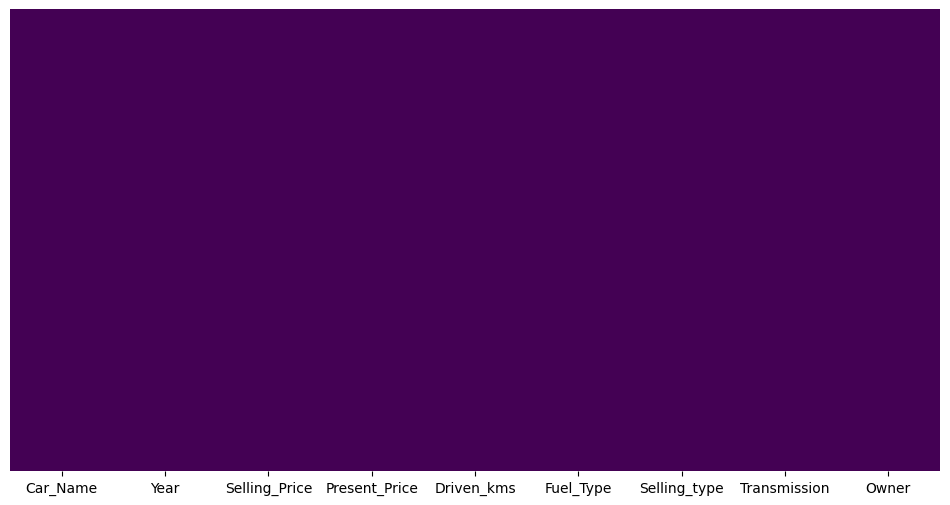

In [62]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

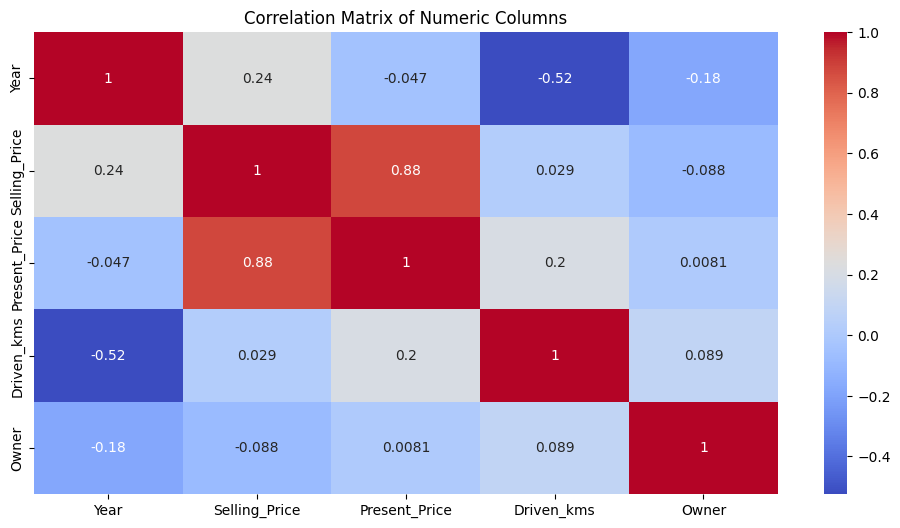

In [63]:
numeric_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm") # plot the correlation matrix
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

In [64]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


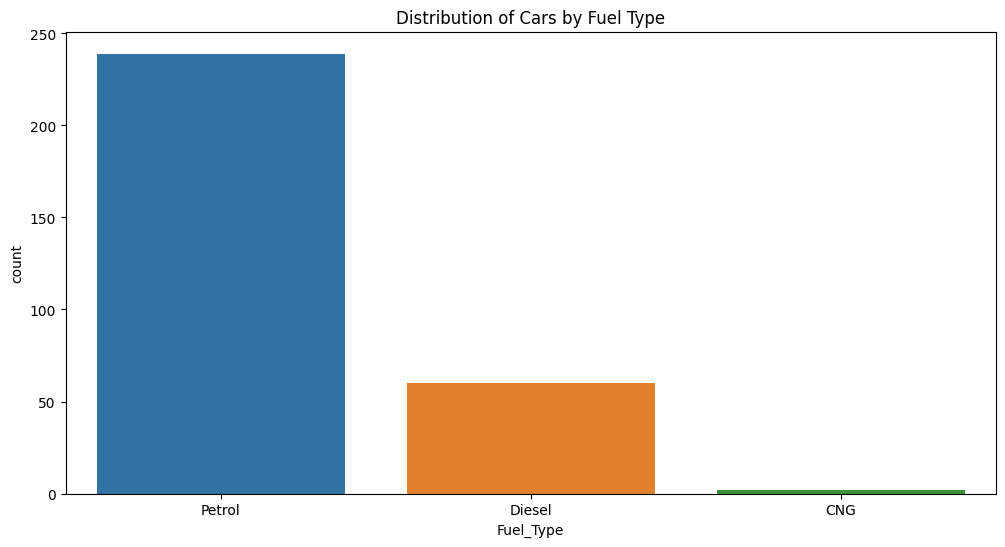

In [65]:
# Bar chart for Fuel_Type distribution
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribution of Cars by Fuel Type')
plt.show()

#### **Box chart for Selling Price by Transmission type**

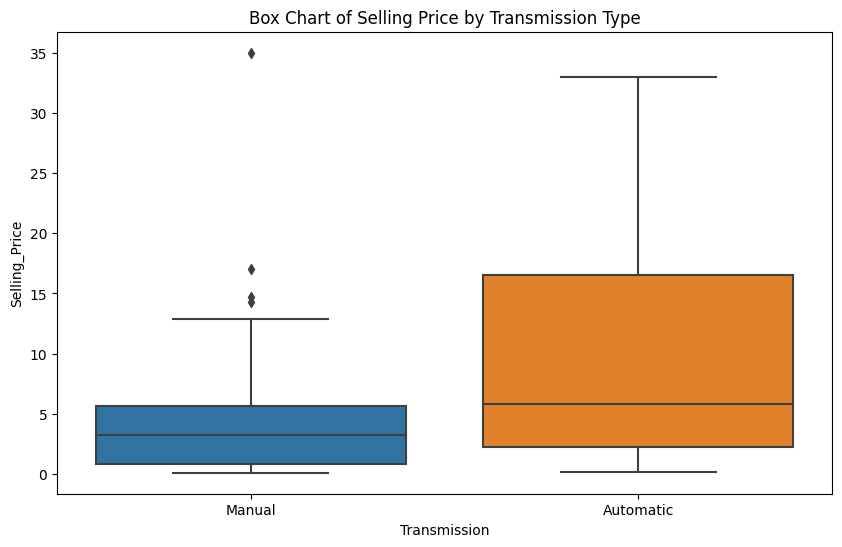

In [66]:
# Box chart for Selling_Price by Transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Box Chart of Selling Price by Transmission Type')
plt.show()

#### **Multiple charts | Pair Plot of Car Features**

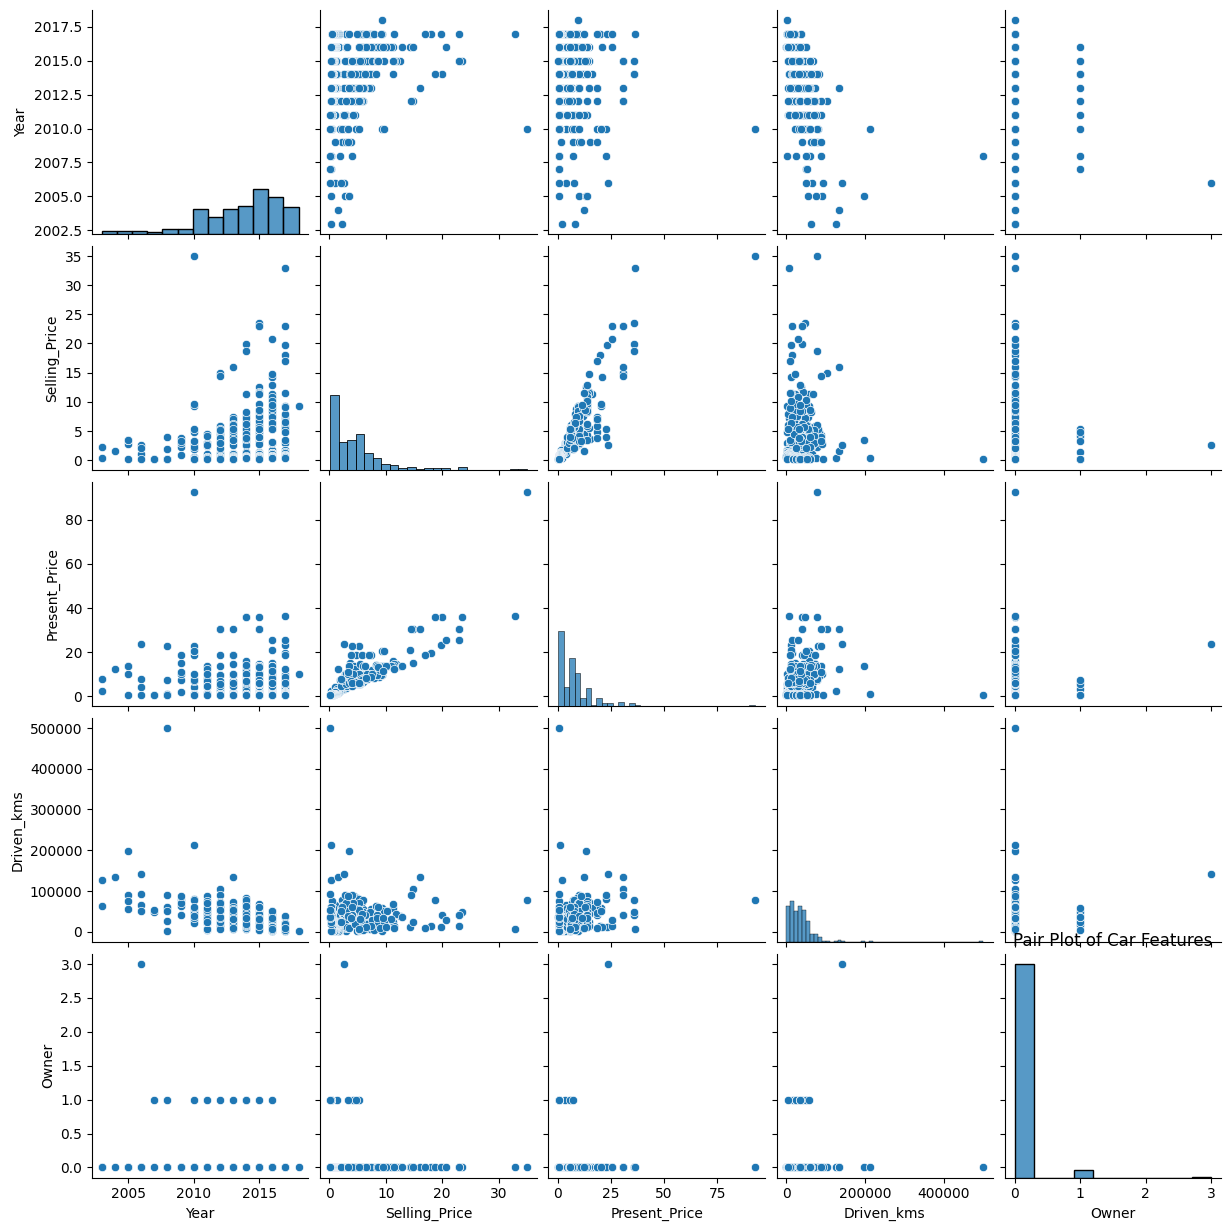

In [67]:
# Multiple charts (Pair plot)
sns.pairplot(df)
plt.title('Pair Plot of Car Features')
plt.show()

#### **Histogram for Selling Price**

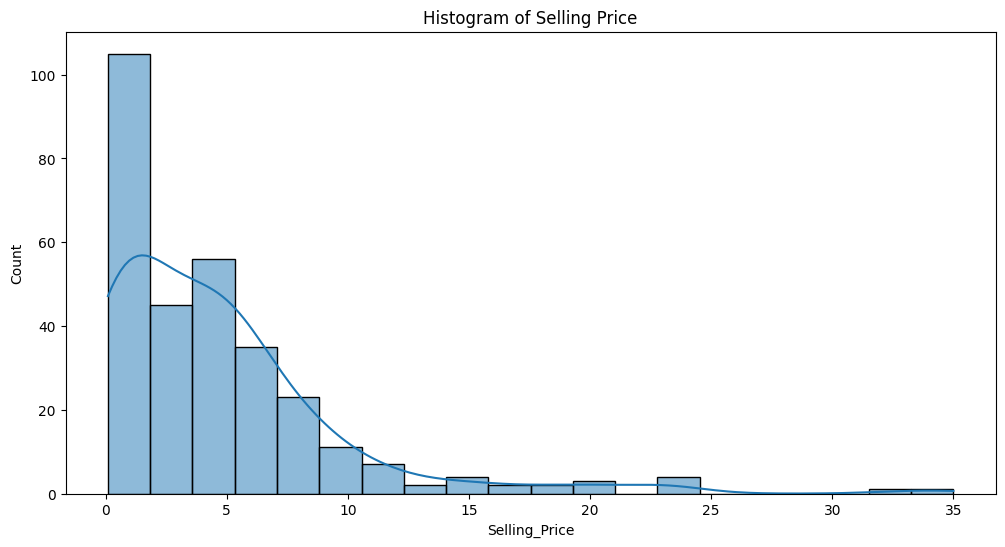

In [68]:
# Histogram for Selling_Price
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Histogram of Selling Price')
plt.show()

#### **Scatter plot for Present Price vs Selling Price**

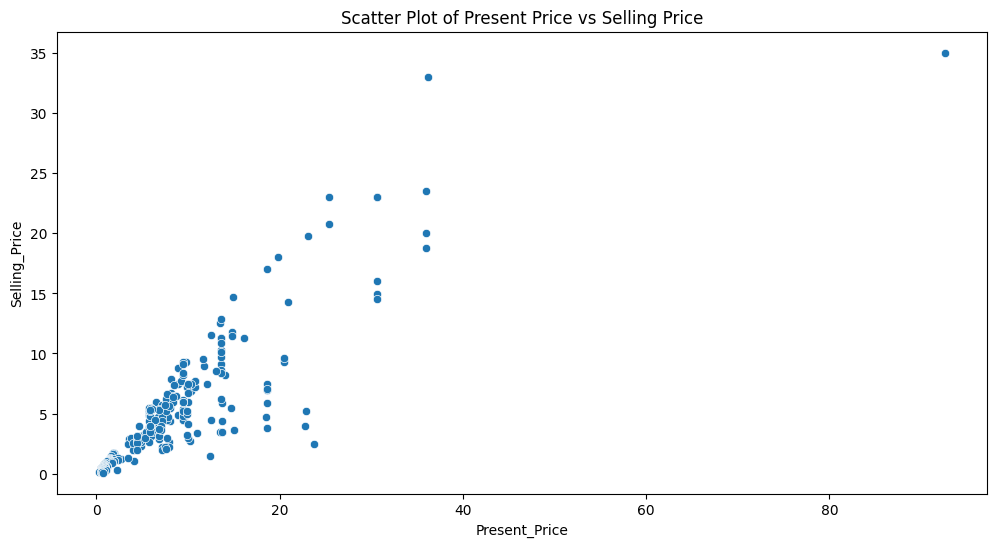

In [69]:
# Scatter plot for Present_Price vs Selling_Price
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Scatter Plot of Present Price vs Selling Price')
plt.show()

#### **Pie chart for Owner Distribution**

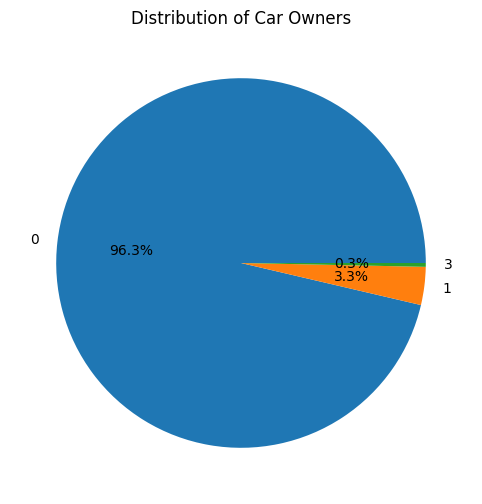

In [70]:
# Pie chart for Owner distribution
owner_distribution = df['Owner'].value_counts()
plt.pie(owner_distribution, labels=owner_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Car Owners')
plt.show()

#### **Bubble chart - Selling Price vs Driven KMs**

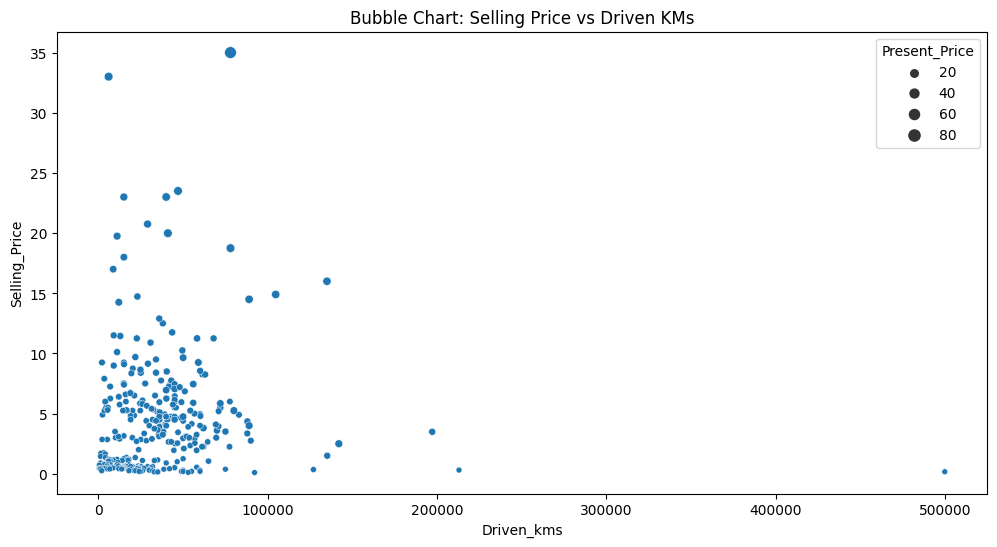

In [71]:
# Bubble chart - Selling Price vs Driven KMs
sns.scatterplot(x='Driven_kms', y='Selling_Price', size='Present_Price', data=df)
plt.title('Bubble Chart: Selling Price vs Driven KMs')
plt.show()

#### **Selling Price over Years**

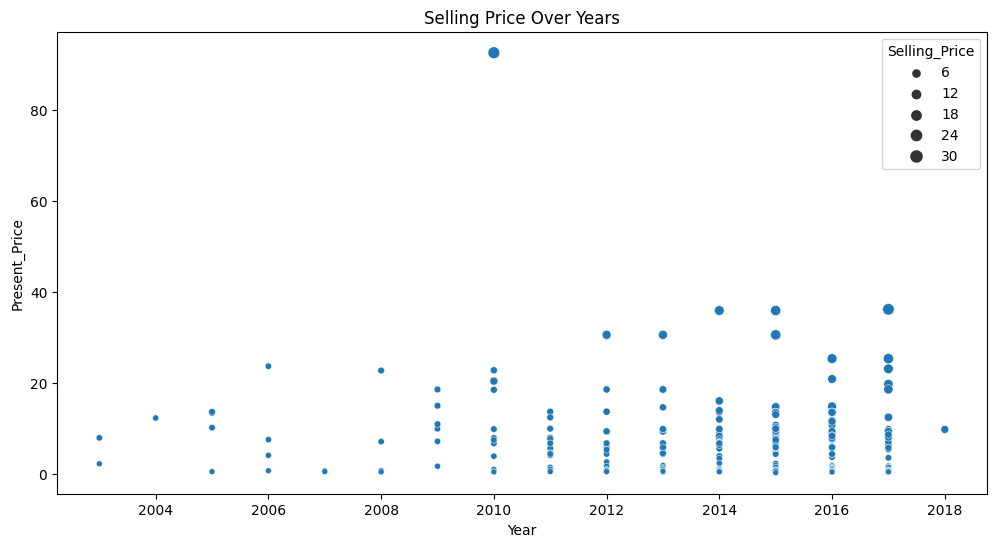

In [72]:
# Scatter plot - Selling Price over Years
sns.scatterplot(x='Year', y='Present_Price', size='Selling_Price', data=df)
plt.title('Selling Price Over Years')
plt.show()

#### **Removal Outliers**

In [73]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [74]:
df.shape

(301, 9)

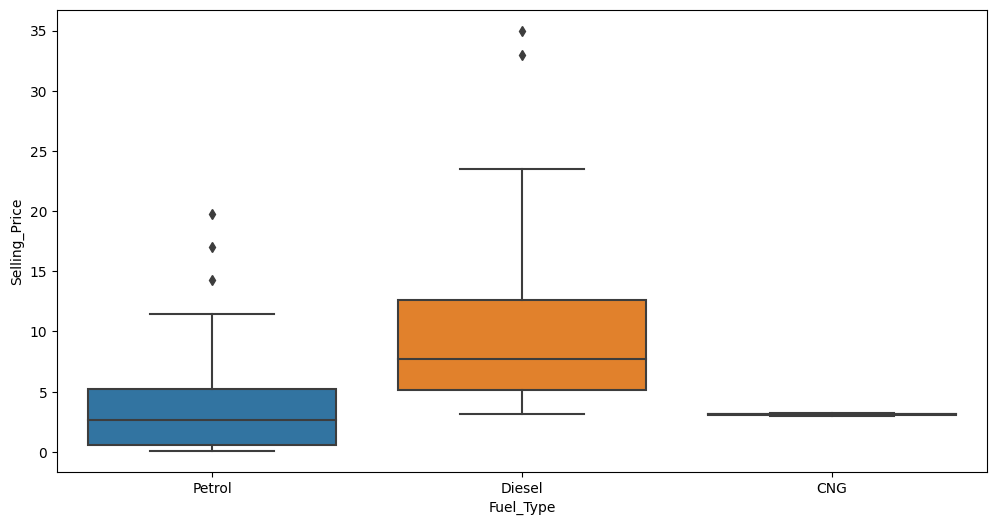

In [75]:
sns.boxplot(data = df, x='Fuel_Type', y ='Selling_Price' )
plt.show()

- #### **IQR Method**

In [76]:
# IQR Method

Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 -Q1

IQR

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Selling_Price']>lower_bound) & (df['Selling_Price']<upper_bound)]

In [77]:
df.shape

(284, 9)

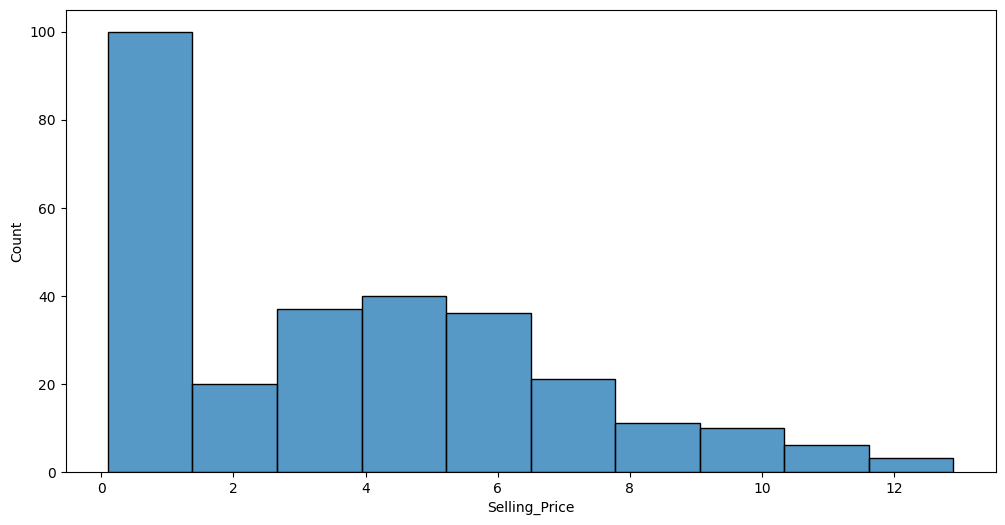

In [78]:
sns.histplot(df['Selling_Price'])
plt.show()

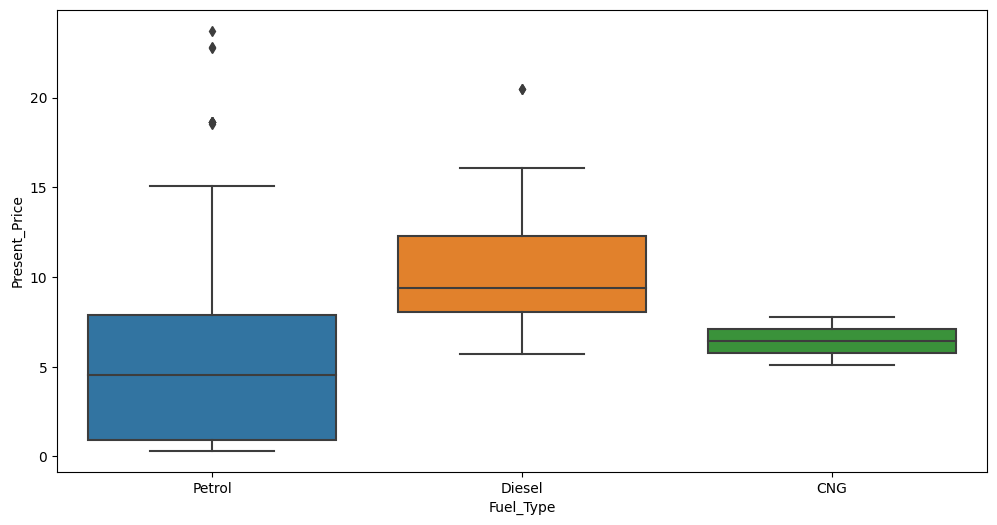

In [79]:
sns.boxplot(data = df, x='Fuel_Type', y ='Present_Price' )
plt.show()

In [80]:
Q1 = df['Present_Price'].quantile(0.25)
Q3 = df['Present_Price'].quantile(0.75)
IQR = Q3 -Q1

IQR

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Present_Price']>lower_bound) & (df['Present_Price']<upper_bound)]

In [81]:
df.shape

(281, 9)

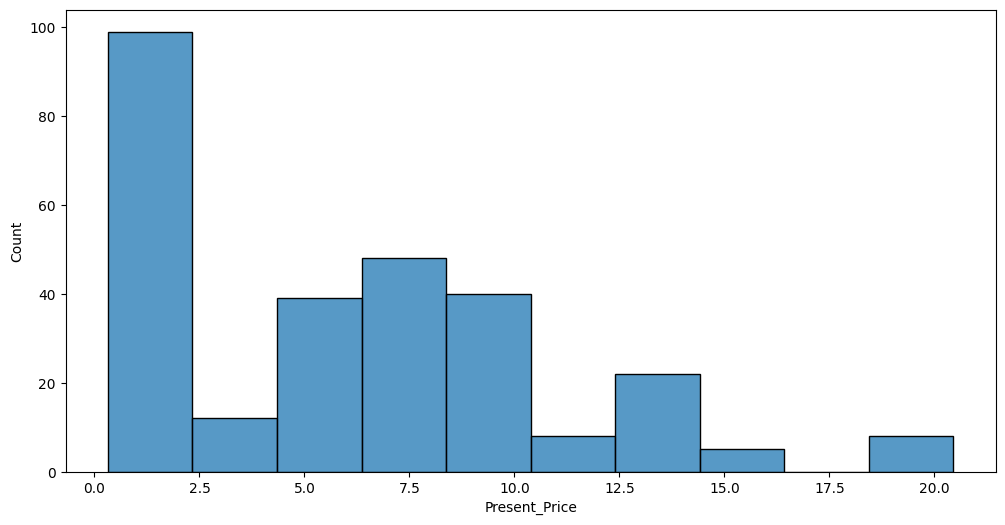

In [82]:
sns.histplot(df['Present_Price'])
plt.show()

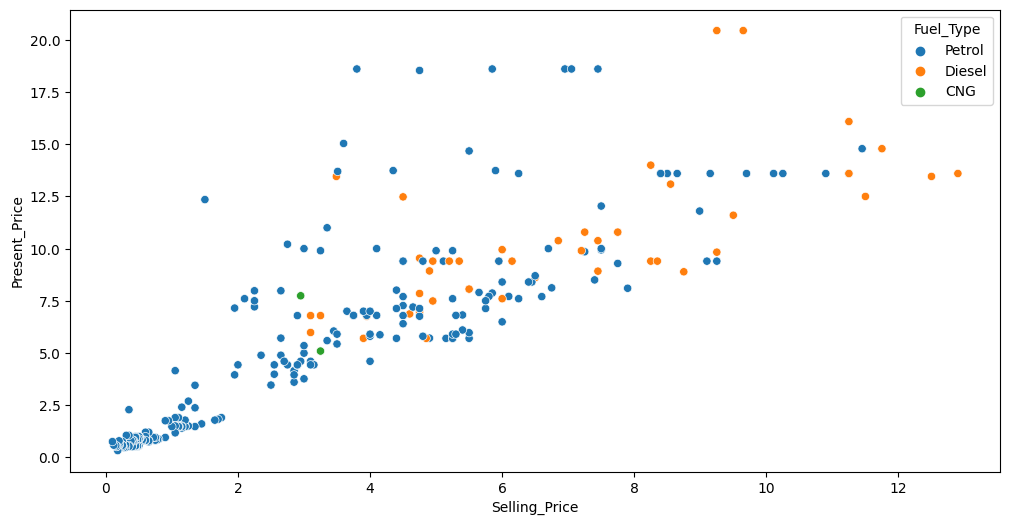

In [83]:
sns.scatterplot(x="Selling_Price", y="Present_Price", hue="Fuel_Type", data=df)
plt.show()

### **Step 3: Machine Learning Model**

 - The `data` is `prepared` for the `machine learning model` by selecting relevant `features (X)` and the `target variable (y)`. 
 - The `dataset` is `split` into `training` and `testing sets`. 
 - The `features` are `standardized` using `StandardScaler`, and a `Linear Regression model` is `created`, `trained`, and `evaluated` using `Mean Squared Error.`

#### **Prepare the data for the machine learning model**

In [84]:
# Prepare the data for the machine learning model
X = df[['Year', 'Present_Price', 'Driven_kms', 'Owner']]  # Features
y = df['Selling_Price']  # Target variable

#### **Split the data into training and testing sets**

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Standardize the features**

In [86]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Create a Linear Regression Model**

In [87]:
# Create a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

#### **Make predictions on the test set**

In [88]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

#### **Evaluate the model**

In [89]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.252182466314281


### **Step 4: User input & prediction**

 - The `user` is prompted to` input details` about a `car`, including the `manufacturing year`, `present price`, `driven kilometers`, and the number of previous `owners`. 
 - The `user input` is then `standardized`, and the `Linear Regression model predicts` the `selling price` based on this input.

In [90]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [91]:
# User input for prediction
user_input_year = int(input("Enter the Car Manufacturing Year: "))
user_input_present_price = float(input("Enter the Present Price of the Car: "))
user_input_driven_kms = int(input("Enter the Driven Kilometers of the Car: "))
user_input_owner = int(input("Enter the Number of Previous Owners: "))

In [92]:
print("Car Manufacturing Year is:",user_input_year)
print("Present Price of the Car is:",user_input_present_price)
print("Driven Kilometers of the Car is:",user_input_driven_kms)
print("Number of Previous Owners is:",user_input_owner)

Car Manufacturing Year is: 2016
Present Price of the Car is: 7.56
Driven Kilometers of the Car is: 40000
Number of Previous Owners is: 1


#### **Create a User Input Array**

In [93]:
# Create a user input array
user_input = np.array([[user_input_year, user_input_present_price, user_input_driven_kms, user_input_owner]])

#### **Standardize User Input**

In [94]:
# Standardize User Input
user_input_scaled = scaler.transform(user_input)

#### **Selling Price Predict with the Linear Regression Model**

In [95]:
# Selling Price Predict with the Linear Regression Model
linear_prediction = linear_model.predict(user_input_scaled)

In [96]:
print(f'Selling Price Prediction with the Linear Regression Model is: {linear_prediction[0]}')

Selling Price Prediction with the Linear Regression Model is: 5.9499755071546785


 - This project provides a comprehensive approach to predicting car prices, from data loading and exploration to machine learning model creation and user interaction. 
 - The model's ability to predict car prices makes it a valuable tool for those interested in understanding and predicting the value of cars based on various factors.